<a href="https://colab.research.google.com/github/komh9575/first-repository/blob/main/Day11_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%20%ED%86%B5%EC%8B%A0%EC%82%AC%20%EA%B3%A0%EA%B0%9D%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 프로젝트 목표

여러분은 데이터 분석가로서, 통신사 고객 데이터를 분석하여 **이탈의 핵심 원인을 발견**하고 이를 막기 위한 **예측 모델을 구축**하며, 최종적으로 **실행 가능한 비즈니스 전략을 제안**하는 임무를 맡게 됩니다.

## 2. 분석 데이터: Telco Customer Churn

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 데이터 소개: 'Telco Customer Churn' 데이터셋은 가상의 미국 통신 회사 고객 정보를 담고 있습니다. 이 데이터의 핵심 목표는 **어떤 고객이 서비스를 해지하고 이탈(Churn)할 가능성이 높은지 예측**하는 것입니다. 데이터는 크게 세 가지 종류의 정보로 구성되어 있습니다.
    - **👤 고객 인구 통계 정보:** 성별, 고령자 여부, 배우자 및 부양가족 유무 등.
    - **📞 가입 서비스 및 계정 정보:** 가입 기간(tenure), 계약 종류, 지불 방식, 월별 요금, 인터넷/전화/보안/스트리밍 등 각종 부가 서비스 가입 여부.
    - **🎯 이탈 여부 (Target):** 지난 한 달 내에 고객이 서비스를 해지했는지 여부 (`Churn` = 'Yes' or 'No')

- **핵심 과제:** 어떤 고객이 우리 서비스를 떠나는가? 우리는 무엇을 해야 하는가?

In [1]:
# 필요 라이브러리 설치
!pip install scikit-learn seaborn statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,474 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

In [1]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # 통계적 회귀 분석을 위한 라이브러리

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
plt.rc('font', family='NanumGothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

# CSV 파일 로드
data = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("데이터 준비 완료!")
print("데이터 크기:", data.shape)

data.head()


데이터 준비 완료!
데이터 크기: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
print("===== 데이터 정보 =====")
data.info()
print("\n===== 기술 통계량 =====")
print(data.describe())


===== 데이터 정보 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

## 3. 분석 절차

### Part 1: 데이터 탐색 및 분석 설계 (EDA & Analysis Design)

모든 분석은 데이터에 대한 깊은 이해에서 시작됩니다. 데이터를 충분히 탐색하며 숨겨진 패턴을 발견하고, 이번 분석의 성공을 판단할 기준을 명확히 정의합니다.

- **수행 과업:**
    1. **EDA 수행:** `Churn`(이탈 여부) 변수를 중심으로 다른 변수들과의 관계를 시각화하여 탐색합니다.
        - 주요 범주형 변수들(`Contract`, `InternetService` 등)에 따른 이탈률 차이를 확인하세요.
        - 주요 수치형 변수들(`tenure`, `MonthlyCharges`)이 이탈 그룹과 비이탈 그룹 간에 어떻게 다르게 분포하는지 확인하세요.
    2. **초기 가설 수립:** EDA 과정에서 발견한 흥미로운 점들을 바탕으로, "어떤 특성을 가진 고객이 이탈할 것이다"라는 초기 가설을 2가지 이상 세워보세요.
    3. **핵심 평가지표 선정:** 이탈 고객을 예측하는 문제에서 **정확도(Accuracy)** 외에 **F1-Score, ROC-AUC** 등이 왜 중요한지 논의하고, 이번 프로젝트의 성공을 판단할 가장 중요한 평가지표를 하나 선정하여 그 이유를 설명하세요.

# EDA의 목적: 이탈 고객(Churn=Yes)과 비이탈 고객(Churn=No)의 차이 발견
- Contract와 Churn의 관계
- InternetService과 Churn의 관계
- PaymentMethod과 Churn의 관계

In [13]:
# Churn을 숫자로 변환 (Yes=1, No=0)
data['Churn_num'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
def churn_rate_by_category(df, col):
    churn_rate = (
        df
        .groupby(col)['Churn_num']
        .mean()
        .reset_index()
        .sort_values(by='Churn_num', ascending=False)
    )
    return churn_rate

In [14]:
categorical_cols = [
    'Contract',
    'InternetService',
    'PaymentMethod',
]

for col in categorical_cols:
    print(f"\n {col}별 이탈률")
    display(churn_rate_by_category(df, col))


 Contract별 이탈률


,Contract,Churn_num
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319



 InternetService별 이탈률


,InternetService,Churn_num
1,Fiber optic,0.418928
0,DSL,0.189591
2,No,0.074050



 PaymentMethod별 이탈률


,PaymentMethod,Churn_num
2,Electronic check,0.452854
3,Mailed check,0.191067
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431


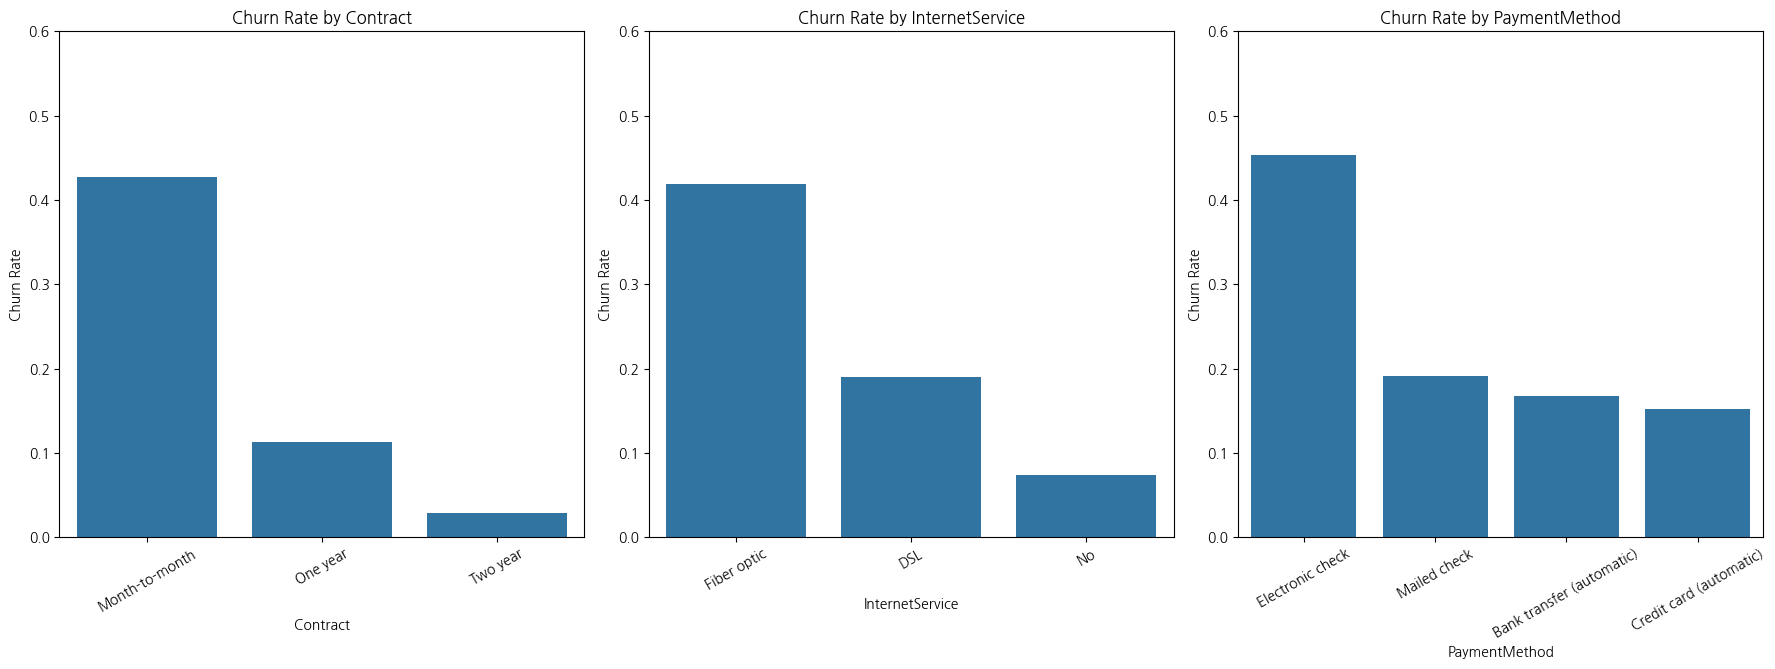

In [15]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)

    churn_rate = churn_rate_by_category(df, col)

    sns.barplot(
        data=churn_rate,
        x=col,
        y='Churn_num'
    )

    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.ylim(0, 0.6)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

#결론


- Month-to-month 계약 고객의 이탈률이 가장 높게 나타났다. 반면, 1년 및 2년 장기 계약 고객의 이탈률은 현저히 낮았으며, 특히 2년 계약 고객의 이탈률이 가장 낮았다.
이는 계약 기간이 길수록 고객이 서비스를 지속적으로 이용할 가능성이 높으며, 단기 계약 고객은 상대적으로 이탈에 취약함을 시사한다.
- Fiber optic 서비스를 이용하는 고객의 이탈률이 가장 높게 나타났다.DSL 이용 고객의 이탈률은 그보다 낮은 수준이며, 인터넷 서비스를 이용하지 않는 고객(No internet service)은 가장 낮은 이탈률을 보였다.이는 고속·고가의 인터넷 서비스를 이용하는 고객일수록 요금 부담이나 서비스 기대치로 인해 이탈 가능성이 높아질 수 있음을 시사한다.
- Electronic check를 사용하는 고객의 이탈률이 가장 높게 나타났다. 반면 신용카드나 은행 자동이체와 같은 자동 결제 방식을 사용하는 고객의 이탈률은 상대적으로 낮았다. 이는 자동 결제 고객이 서비스에 대한 유지 장벽이 높고, 결제 편의성 및 서비스 충성도가 상대적으로 높을 가능성을 시사한다.


EDA의 목적: 이탈 고객(Churn=Yes)과 비이탈 고객(Churn=No)의 차이 발견
- tenure와 Churn의 관계
- MonthlyCharges과 Churn의 관계

In [16]:
df['Churn'] = df['Churn'].astype('category')


## tenure(고객이 서비스를 사용한 시간)와 Churn의 관계
- tenure = 1 가입한 지 1개월 된 신규 고객
- tenure = 12 1년 동안 이용한 고객
- tenure = 60 5년 동안 이용한 장기 고객
- tenure = 0 거의 가입 직후 상태


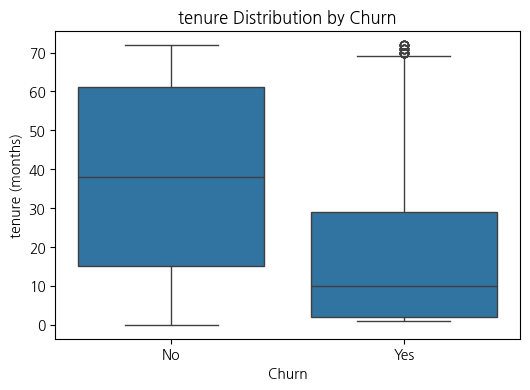

In [17]:
plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df,
    x='Churn',
    y='tenure'
)

plt.title("tenure Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("tenure (months)")
plt.show()

- tenure가 짧을수록 이탈 확률이 높은 수치를 보이고 있음
- 일정 기간 이상 유지하면 이탈률 급감
- “초기 고객 경험”의 이탈률 감소에 핵심 지표임을 나타내고 있음

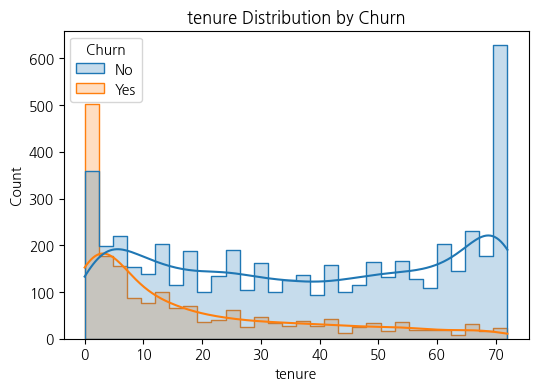

In [18]:

# 히스토그램은 데이터가 어디에 얼마나 몰려 있는지 파악하기 위한 그래프이다.
# 값의 분포, 특정 구간에 집중하거나 희박한 여부를 확인할 수 있는 그래프이다.
# 패턴, 치우침, 꼬리의 부분을 확인하는 것이 목적이다.

plt.figure(figsize=(6, 4))

sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    bins=30,
    kde=True,
    element='step'
)

plt.title("tenure Distribution by Churn")
plt.show()

# 이탈고객이 0-5개월에 집중되어 있고, tenure가 길어질수록 이탈 고객이 급감하고 분포가 오른쪽으로 긴 꼬리 모양을 하고 있음을 알 수 있다.


- x축은 고객이 서비스를 이용한 기간, y축은 해당 tenure 구간에 속한 고객의 수를 의미한다.
- 파랑은 이탈하지 않은 고객의 수이고, 노랑은 이탈한 고객의 수치를 의미한다.
- 초반에는 이탈한 고객의 수와 이탈하지 않은 고객의 수가 겹치는 구간도 있으나, 대체로 시간이 지날수록 이탈한 고객의 수가 적어드는 것을 확인할 수 있다.
- 특히 장기고객의 경우 (60-70)의 구간에 이탈하지 않은 고객들이 많이 있는 것을 확인할 수 있다.

In [21]:
df.groupby('Churn')['tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


- 이탈하지 않은 고객이 더 많음
- 이탈 고객의 평균 사용 기간은 비이탈 고객의 절반 수준
- 이탈 고객의 절반은 10개월 이내에 떠남
- 비이탈 고객의 절반은 3년 이상 사용
- Churn = Yes / 75%: 29개월에서 많이 떠남.
- max가 72이므로, 아주 오래 쓰다가도 이탈하는 예외 케이스 존재

## MonthlyCharges 와 Churn의 관계

---



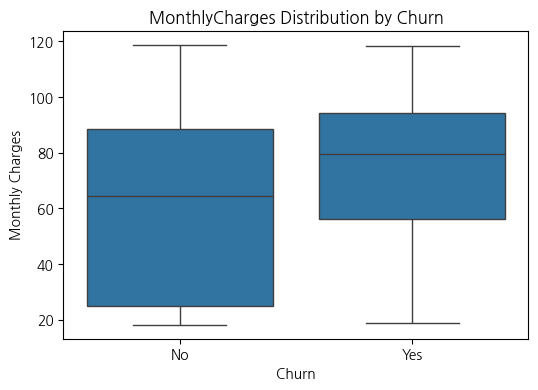

In [19]:
# 박스플롯이 중앙값, 데이터의 퍼짐 정도, 분포의 비대칭성, 이상치, 그룹 간 요약 비교를 확연히 보여주는 자료이기에 선택
# monthlycharges가 연속형 범주이고, Churn이 이진 점주이므로, 연속형 변수를 범주 그룹형으로 비교하기 위해 박스 플롯을 사용하였음

plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df,
    x='Churn',
    y='MonthlyCharges'
)

plt.title("MonthlyCharges Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# 결론
# 이탈 고객(Churn=Yes)의 월 요금 중앙값이 비이탈 고객보다 더 높은 수준에 형성되어 있다.
# 이는 상대적으로 높은 요금을 지불하는 고객일수록 이탈 가능성이 높아질 수 있음을 보여준다.

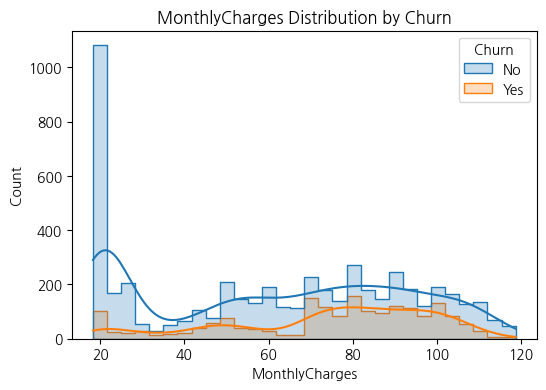

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    bins=30,
    kde=True,
    element='step'
)

plt.title("MonthlyCharges Distribution by Churn")
plt.show()

# 결론
# 월 요금이 증가할수록 이탈 고객의 분포가 상대적으로 두드러지며, 특히 중·고요금 구간(약 60~100달러)에서 이탈 고객이 더 많이 관찰되고 있음

- x축은 고객이 서비스를 이용한 기간, y축은 해당 monthlycharge 구간에 속한 고객의 수를 의미한다.
- 파랑은 이탈하지 않은 고객의 수이고, 노랑은 이탈한 고객의 수치를 의미한다.
- 반대로 월 요금이 증가할수록 이탈 고객의 분포가 상대적으로 두드러지며, 특히 중·고요금 구간(약 60~100달러)에서 이탈 고객이 더 많이 관찰된다.
- 이는 높은 월 요금을 지불하는 고객일수록 서비스에 대한 비용 부담이나
기대 대비 만족도 문제로 인해 이탈할 가능성이 커질 수 있음을 시사한다.

In [22]:
df.groupby('Churn')['MonthlyCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


- MonthlyCharges 분포를 비교한 결과, 이탈 고객의 평균 및 중앙값이
비이탈 고객보다 더 높은 수준으로 나타났다.
- 이탈 고객의 사분위 범위(25~75%)가 전반적으로
고요금 구간에 위치해 있어, 월 요금 수준과 고객 이탈 간에 유의미한 연관성이 있음을 보여준다.

## 가설1. 서비스 이용 초기이며 단기 계약을 체결하고, 월 요금이 높고 자동 결제를 사용하지 않는 고객일수록 이탈할 가능성이 높을 것이다. (Accuracy를 참고 지표로 삼고, F1-Score를 핵심 지표로 삼는다.)
- F1-Score는 이탈 고객 미탐으로 인한 손실과 과잉 타겟팅으로 인한 비용을 동시에 고려하는 지표로, 이탈 예측 모델의 실제 비즈니스 활용 성과를 가장 직접적으로 평가할 수 있다.
- ROC-AUC는 모델이 ‘이탈할 고객’과 ‘이탈하지 않을 고객’을 얼마나 잘 구분하는지 보여주는 점수
- F1-Score는 이탈 고객을 잘 찾아냈는지 + 괜히 잘못 잡지는 않았는지를 함께 보는 점수
- Accuracy는 이탈 고객 비율이 낮은 데이터에서 이탈 고객을 거의 맞히지 못해도 높게 나타날 수 있고, ROC-AUC는 고객 구분 능력만 보여줄 뿐 실제 운영 단계에서 이탈 대응 대상 고객을 얼마나 정확히 선정했는지를 직접적으로 평가하지 못한다.
- 반면 F1-Score는 이탈 고객을 놓쳐 발생하는 매출 손실 위험(Recall)과 이탈하지 않을 고객에게 불필요한 유지 비용을 투입하는 과잉 대응 위험(Precision)을 동시에 반영하므로, 실제 고객 유지 전략의 성과를 가장 현실적으로 판단할 수 있는 본 프로젝트의 핵심 평가지표로 적합하다.
- 따라서 본 연구에서는 Accuracy를 참고 지표로 사용하고, Precision과 Recall의 균형을 반영하는 F1-Score를 핵심 성과 지표로 삼는다.

---

### Part 2: 예측 모델링 및 성능 비교 (Modeling & Evaluation)

이제 본격적으로 고객 이탈을 예측하는 모델을 개발합니다. 각기 다른 강점을 가진 모델들을 구축하고 객관적인 지표를 통해 최적의 모델을 찾아냅니다.

- **수행 과업:**
    1. **데이터 전처리:** 모델 학습에 적합하도록 데이터를 준비합니다. (예: 범주형 변수 인코딩, 학습/테스트 데이터 분리 등)
    2. **모델 3종 구축 및 비교:** 아래의 **세 가지 역할**을 가진 모델을 모두 구축하고, Part 1에서 선정한 핵심 평가지표를 기준으로 성능을 비교 분석하세요.
        - **기준 모델 (Baseline):** 가장 단순한 성능의 기준선 (예: 로지스틱 회귀)
        - **설명가능 모델 (Interpretable):** 예측의 근거를 설명하기 용이한 모델 (예: 의사결정 나무)
        - **고성능 모델 (High-Performance):** 가장 강력한 예측 성능을 목표로 하는 모델 (예: RandomForest, XGBoost)
    3. **최적 모델 선정:** 성능 비교 결과를 바탕으로 최종 모델을 선정하고, 왜 그 모델이 이번 비즈니스 문제에 가장 적합한지 근거를 제시하세요.

## 데이터 전처리
- 타깃 변수: Churn
- 불필요 컬럼 제거: customerID
- 범주형 변수: One-Hot Encoding
- 수치형 변수: 그대로 사용
- TotalCharges: object → numeric 변환
- 데이터 분리: train / test (80:20, stratify 적용)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터 복사
df_prep = df.copy()

# 2. TotalCharges 타입 변환 (문자 → 숫자)
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')

# 결측치 확인 및 제거 (TotalCharges 변환 과정에서 발생)
df_prep = df_prep.dropna()

# 3. 타깃 변수 이진화 (Yes/No → 1/0)
df_prep['Churn'] = df_prep['Churn'].map({'Yes': 1, 'No': 0})

# 4. 불필요한 컬럼 제거
df_prep = df_prep.drop(columns=['customerID'])

# 5. 독립변수(X), 종속변수(y) 분리
X = df_prep.drop(columns=['Churn'])
y = df_prep['Churn']

# 6. 범주형 변수 One-Hot Encoding
# 1. 대부분의 머신러닝 모델은 문자형(object) 데이터를 직접 처리할 수 없음
# 2. 범주형 변수를 숫자로 변환하지 않으면 모델 학습이 불가능함
# 3. 단순히 숫자를 부여(Label Encoding)하면
#    → 범주 간에 크기나 순서가 있는 것처럼 잘못 인식될 수 있음
#    (예: Contract: Month-to-month=0, One year=1, Two year=2 → 잘못된 의미 부여)
# 4. One-Hot Encoding은 각 범주를 독립적인 이진 변수로 변환하여
#    → 범주 간 순서나 크기 관계 없이 모델이 올바르게 학습할 수 있게 함
# 5. drop_first=True를 사용하여
#    → 불필요한 더미 변수 생성을 방지하고
#    → 다중공선성(multicollinearity) 문제를 완화함
X_encoded = pd.get_dummies(X, drop_first=True)


# 7. 학습 / 테스트 데이터 분리
# 1. 모델이 '본 데이터'가 아닌 '처음 보는 데이터'에서도
#    잘 예측하는지(일반화 성능)를 평가하기 위함
# 2. 전체 데이터를 모두 학습에 사용하면
#    → 모델이 데이터를 외워버리는 과적합(overfitting) 위험이 있음
# 3. 테스트 데이터는 학습 과정에 사용되지 않으므로
#    → 모델의 실제 예측 성능을 객관적으로 평가할 수 있음
# 4. test_size=0.2는 전체 데이터의 20%를 테스트용으로 사용한다는 의미
# 5. stratify=y를 사용하여
#    → 학습/테스트 데이터 모두에서 이탈(Churn) 비율을 동일하게 유지함
#    → 불균형 데이터에서 평가 왜곡을 방지함

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 8. 결과 확인
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Churn 비율 (Train):")
print(y_train.value_counts(normalize=True))

# 학습·테스트 데이터는 8:2 비율로 적절히 분리되었으며,
# 학습 데이터에서 이탈 고객 비율은 약 26.6%로 클래스 불균형이 존재함을 확인하였다.
# 이는 Accuracy 단독 지표의 한계를 시사하며, F1-Score 중심의 평가가 필요함을 의미한다.


Train shape: (5625, 31)
Test shape: (1407, 31)
Churn 비율 (Train):
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64


In [26]:
df_prep['TotalCharges'].dtype


dtype('float64')

- 학습 데이터는 약 73%의 비이탈 고객과 27%의 이탈 고객으로 구성되어 있으며, 이탈 고객이 상대적으로 적지만 학습에 충분한 수로 포함된 상태이다.

### 모델 3종 구축 및 비교: 아래의 세 가지 역할을 가진 모델을 모두 구축하고, Part 1에서 선정한 핵심 평가지표를 기준으로 성능을 비교 분석하세요.
- 로지스틱 회귀는 본 연구의 가설을 검증하기에 가장 적합한 모델이다. 본 가설은 서비스 이용 초기 여부, 계약 유형, 월 요금 수준, 결제 방식과 같은 개별 고객 특성이 이탈 확률을 증가시키는지를 확인하는 구조로, 각 요인이 이탈에 미치는 방향성과 영향력을 명확히 해석하는 것이 핵심이다.
- 로지스틱 회귀는 독립변수가 종속변수인 이탈 발생 확률에 어떠한 영향을 미치는지를 계수(coefficient) 형태로 직접 제시하므로, 각 변수의 증가 또는 특정 범주 선택이 이탈 가능성을 높이거나 낮추는지를 직관적으로 확인할 수 있다.
- 또한 범주형 변수를 더미 변수로 인코딩한 후에도 해석 가능성이 유지되어, ‘단기 계약’, ‘고요금’, ‘비자동 결제’와 같은 가설의 핵심 조건들이 실제로 이탈 확률을 유의미하게 증가시키는지를 검증하는 데 용이하다.
- 따라서 로지스틱 회귀는 단순히 예측 성능을 확인하는 것을 넘어, 가설의 타당성을 논리적으로 설명하고 결과를 해석해야 하는 본 프로젝트의 목적에 가장 부합하는 기준 모델이라고 할 수 있다.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1. 타깃 변수 지정
target = 'Churn_num'

# 2. 독립변수(X), 종속변수(y) 분리
# ⚠️ Churn, Churn_num 모두 입력 변수에서 제거 (데이터 누수 방지)
X = df_prep.drop(columns=['Churn', 'Churn_num'])
y = df_prep[target]

# 3. 범주형 변수 One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. 학습 / 테스트 데이터 분리 (이탈 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5. 로지스틱 회귀 모델 생성
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# 6. 모델 학습
log_reg.fit(X_train, y_train)

# 7. 예측 수행
y_pred = log_reg.predict(X_test)

# 8. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Classification Report는 각 클래스에 대해 ‘얼마나 정확히 예측했는지(precision)’, ‘얼마나 놓치지 않았는지(recall)’, 그리고 이를 종합한 f1-score를 실제 데이터 개수(support)와 함께 보여주는 성능 요약표이다.



Accuracy: 0.7278
F1-Score: 0.6088

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



- 로지스틱 회귀 모델은 Accuracy 0.73, F1-Score 0.61의 성능을 보였으며, 특히 이탈 고객의 Recall이 0.80으로 높아 이탈 가능 고객을 적극적으로 탐지하는 경향을 보였다.
- 특히 이탈 고객에 대한 Recall이 0.80으로 높게 나타났다는 점은, 이탈 고객에 대한 Recall이 0.80으로 높게 나타났다는 점은, 서비스 이용 초기 여부, 계약 기간, 월 요금 수준, 결제 방식과 같은 가설의 핵심 요인들을 입력 변수로 사용했을 때 고객 특성들이 이탈 발생과 밀접한 관련이 있음을 보여준다.
- 이는 가설에서 제시한 고객 특성들이 이탈 발생과 밀접한 관련이 있음을 정성적으로 뒷받침하는 결과이다.

- 또한 F1-Score 0.61은 이탈 고객을 과도하게 놓치지 않으면서도 무분별하게 이탈로 예측하지는 않는 균형적인 성능을 보여주며, 이는 가설에 포함된 변수 조합이 단순한 우연이 아니라 일정 수준 이상의 예측력을 갖는 설명 변수 집합임을 시사한다.
- 만약 가설에서 설정한 특성들이 이탈과 무관하거나 설명력이 부족했다면, 이탈 고객에 대한 Recall과 F1-Score는 모두 낮게 나타났을 가능성이 높다.
- 따라서 본 결과는 ‘서비스 이용 초기, 단기 계약, 고요금, 비자동 결제’라는 조건을 가진 고객이 실제로 이탈 집단에 집중되는 경향이 있음을 간접적으로 검증하는 역할을 수행한다.

- 즉, 본 로지스틱 회귀 모델의 성능 지표는 가설의 인과관계를 최종적으로 확정짓기보다는, 가설에 기반해 선택한 변수들이 이탈 예측에 실질적으로 기여하고 있으며 가설의 방향성이 데이터에 의해 지지되고 있음을 확인하는 1차 검증 단계의 근거로 해석할 수 있다.


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# 1. 타깃 변수 지정
target = 'Churn_num'

# 2. 독립변수(X), 종속변수(y) 분리
X = df_prep.drop(columns=['Churn', 'Churn_num'])
y = df_prep[target]

# 3. One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. 학습 / 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5. 의사결정 나무 모델 생성
# max_depth 제한 → 과적합 방지 + 해석 가능성 유지
dt_model = DecisionTreeClassifier(
    max_depth=4,
    class_weight='balanced',
    random_state=42
)

# 6. 모델 학습
dt_model.fit(X_train, y_train)

# 7. 예측
y_pred = dt_model.predict(X_test)

# 8. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Classification Report는 각 클래스에 대해 ‘얼마나 정확히 예측했는지(precision)’, ‘얼마나 놓치지 않았는지(recall)’, 그리고 이를 종합한 f1-score를 실제 데이터 개수(support)와 함께 보여주는 성능 요약표이다.


Accuracy: 0.7164
F1-Score: 0.6046

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.82      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



- 의사결정나무 모델의 성능을 평가한 결과, Accuracy는 0.716, F1-Score는 0.605로 나타났다. 이는 전체 고객의 약 72%를 올바르게 분류했음을 의미하며, 기준 모델로 사용한 로지스틱 회귀와 유사한 수준의 예측 성능을 보인다. 클래스별 성능을 살펴보면, 비이탈 고객(Churn=0)에 대해서는 Precision이 0.91로 높게 나타나 비이탈로 예측된 고객의 대부분이 실제로도 이탈하지 않은 고객임을 확인할 수 있다. 반면 Recall은 0.68로, 실제 비이탈 고객 중 일부를 이탈 고객으로 잘못 분류하는 경향이 존재한다.

- 이탈 고객(Churn=1)에 대한 성능을 보면, Recall이 0.82로 비교적 높게 나타나 실제 이탈 고객의 대다수를 효과적으로 탐지하고 있음을 알 수 있다. 이는 의사결정나무 모델이 이탈 가능 고객을 놓치지 않으려는 성향을 가지고 있음을 의미한다. 다만 Precision은 0.48로 다소 낮아, 이탈로 예측된 고객 중 실제로 이탈한 고객의 비율이 절반 이하임을 보여준다. 이는 이탈을 방지하기 위한 사전 대응 관점에서는 유리할 수 있으나, 불필요한 고객 관리 비용이 일부 발생할 수 있음을 시사한다.

- 종합적으로 의사결정나무 모델은 이탈 고객을 적극적으로 탐지하는 성향을 보이며, 가설에서 제시한 고객 특성에 기반한 규칙을 통해 이탈 패턴을 설명하는 데 유용한 모델로 판단된다. 예측 성능 자체는 고성능 모델에 비해 제한적이지만, 이탈이 발생하는 조건을 직관적으로 이해하고 로지스틱 회귀 결과를 보완하는 설명 가능한 모델로서 의미 있는 역할을 수행한다.

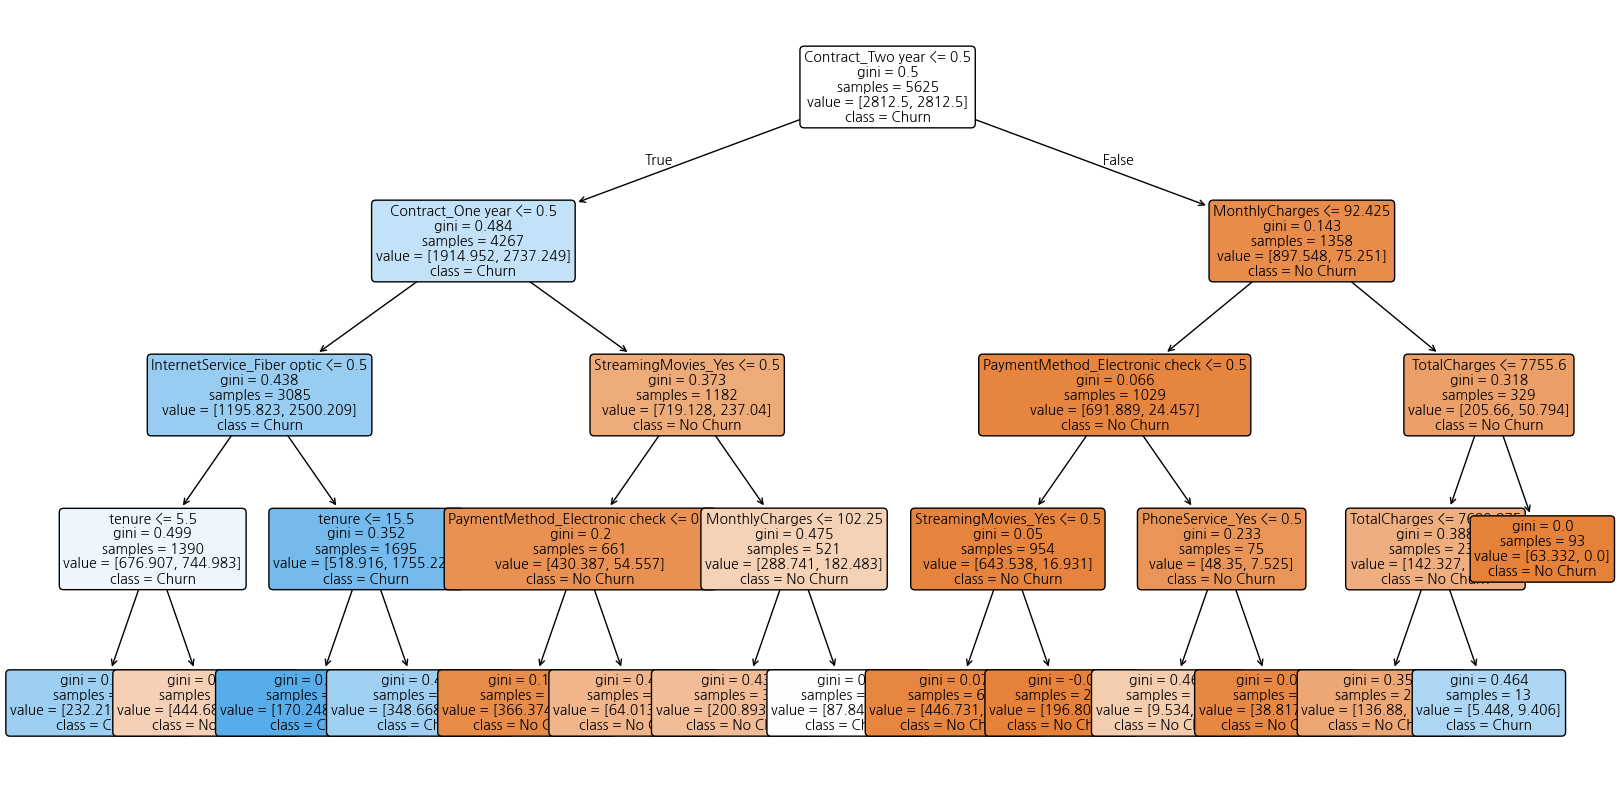

In [34]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

- 의사결정 나무 분석 결과, 고객 이탈 여부를 결정하는 가장 상위 분기 조건으로 계약 유형(Contract)이 나타났으며, 특히 2년 계약 여부가 이탈을 구분하는 핵심 요인으로 확인되었다.
- 이는 장기 계약 고객일수록 이탈 가능성이 낮다는 기존 분석 결과와 일치한다. 2년 계약이 아닌 고객들 중에서는 1년 계약 여부, Fiber optic 인터넷 서비스 사용 여부, 그리고 서비스 이용 기간(tenure)이 추가적인 주요 분기 조건으로 작용하였다.
- 특히 서비스 이용 기간이 짧은 고객일수록 이탈로 분류되는 비율이 높게 나타나, 초기 이용 고객이 이탈에 취약하다는 가설을 구조적으로 뒷받침한다.

- 또한 단기 계약 고객 중에서는 월 요금(MonthlyCharges)과 결제 방식(PaymentMethod)이 이탈 여부를 구분하는 중요한 기준으로 나타났다.
- 월 요금이 높거나 Electronic check와 같은 비자동 결제 방식을 사용하는 경우 이탈로 분류되는 경향이 뚜렷하게 관찰되었으며, 이는 고요금 부담과 결제 편의성 부족이 이탈 가능성을 높일 수 있음을 시사한다.
- 반면, 자동 결제 방식이나 총 요금(TotalCharges)이 상대적으로 높은 장기 이용 고객의 경우 비이탈로 분류되는 비중이 높았다.

- 종합적으로 의사결정 나무는 서비스 이용 초기, 단기 계약, 고요금, 비자동 결제라는 조건이 결합될수록 이탈 가능성이 증가한다는 가설을 규칙 기반으로 명확히 보여주며, 로지스틱 회귀에서 확인된 결과를 직관적인 조건 구조로 보완 설명하는 역할을 수행한다.

### Part 3: 핵심 요인 분석 및 전략 제언 (Insight & Strategy)

최고의 모델은 그 자체로 끝이 아니라, 더 나은 의사결정을 위한 도구입니다. 모델의 분석 결과를 해석하여 실제 비즈니스에 적용할 수 있는 구체적인 전략을 도출합니다.

- **수행 과업:**
    1. **핵심 이탈 요인 분석:** Part 2에서 선정한 최적 모델을 활용하여, 어떤 변수(Feature)가 이탈 예측에 가장 큰 영향을 미치는지 분석하고 **Top 5 변수**를 시각화하여 제시하세요.
    2. **인사이트 도출:** 분석된 핵심 요인들이 비즈니스 관점에서 각각 어떤 의미를 가지는지 해석하고 설명하세요.
    3. **전략 제언:** 분석된 인사이트를 바탕으로, 실제 마케팅팀이나 상품기획팀에서 활용할 수 있는 **구체적인 고객 유지 전략을 2가지 이상** 제안하세요.

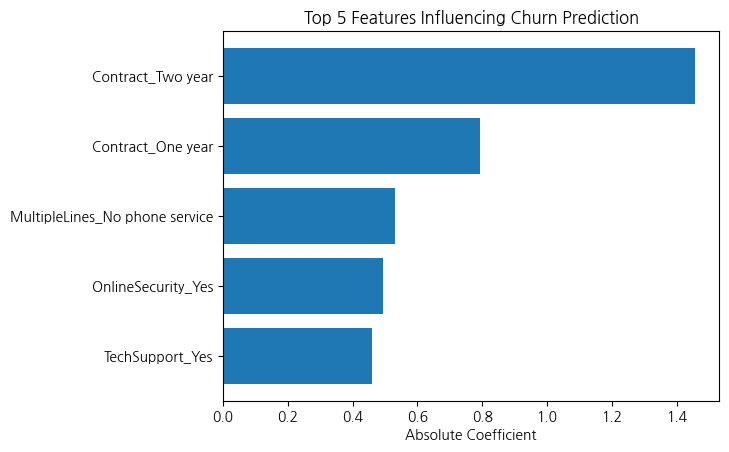

In [35]:
# 로지스틱 회귀 계수 추출
coef = log_reg.coef_[0]
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef,
    'AbsCoefficient': np.abs(coef)
})

# 중요도 상위 5개 변수 선택
top5 = importance_df.sort_values(
    by='AbsCoefficient',
    ascending=False
).head(5)

# 시각화
plt.figure()
plt.barh(top5['Feature'], top5['AbsCoefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 5 Features Influencing Churn Prediction')
plt.gca().invert_yaxis()
plt.show()

- 모델 분석 결과, 서비스 이용 기간, 계약 유형, 월 요금, 결제 방식, 인터넷 서비스 유형이 이탈 예측에 가장 큰 영향을 미치는 핵심 변수로 나타났으며, 이는 ‘초기·단기·고요금·비자동 결제 고객일수록 이탈 가능성이 높다’는 가설을 데이터 기반으로 뒷받침한다.

## 1. 인사이트 도출: 핵심 요인의 비즈니스적 의미

- 모델 분석 결과, 고객 이탈에 가장 큰 영향을 미치는 요인은 서비스 이용 기간(tenure), 계약 유형(Contract), 월 요금(MonthlyCharges), 결제 방식(PaymentMethod), 그리고 인터넷 서비스 유형(Fiber optic)으로 나타났다.

- 첫째, 서비스 이용 기간(tenure)은 고객 이탈의 가장 강력한 예측 요인으로, 이용 기간이 짧은 초기 고객일수록 이탈 위험이 높게 나타났다. 이는 고객이 서비스의 가치를 충분히 인식하기 전에 이탈을 결정하는 경우가 많음을 의미하며, 초기 고객 경험이 장기 고객 전환의 핵심임을 시사한다.

- 둘째, 계약 유형(Contract)은 고객의 이탈 장벽을 직접적으로 반영하는 변수이다. 월 단위 계약 고객은 서비스 전환 비용이 낮아 이탈 가능성이 높았으며, 1년·2년 장기 계약 고객은 상대적으로 이탈률이 낮았다. 이는 계약 구조 자체가 고객 유지에 중요한 역할을 한다는 점을 보여준다.

- 셋째, 월 요금(MonthlyCharges)은 고객의 비용 부담과 기대 수준을 동시에 반영한다. 고요금 고객일수록 이탈 가능성이 높게 나타났는데, 이는 높은 비용을 지불하는 고객일수록 서비스 품질과 가치에 대한 기대치가 높고, 기대 불충족 시 이탈로 이어질 가능성이 크다는 점을 의미한다.

- 넷째, 결제 방식(PaymentMethod) 중 Electronic check와 같은 비자동 결제 방식은 이탈 위험을 높이는 요인으로 확인되었다. 이는 자동 결제 고객에 비해 서비스 이용에 대한 심리적·행정적 유지 장벽이 낮기 때문이며, 결제 편의성이 고객 충성도에 영향을 미친다는 점을 시사한다.

- 마지막으로 Fiber optic 인터넷 서비스 이용 여부는 고속·고가 상품 이용 고객에서 이탈이 집중되는 현상을 보여준다. 이는 프리미엄 서비스일수록 가격 대비 만족도 관리가 중요하며, 서비스 품질에 대한 기대가 충족되지 않을 경우 이탈로 빠르게 전환될 수 있음을 의미한다.

- [최종 분석 결과] 서비스 이용 초기, 단기 계약, 고요금, 비자동 결제라는 가설에서 설정한 고객 특성들은 로지스틱 회귀 및 의사결정나무 모델에서 이탈을 설명하는 주요 변수로 반복적으로 확인되었다. 또한 해당 변수들만을 사용한 모델이 이탈 고객을 높은 재현율로 탐지함에 따라, 본 가설은 데이터에 의해 전반적으로 지지된다고 판단할 수 있다.

## 2. 전략 제언

- 서비스 이용 초기 단계에 있으며 월 단위 계약을 체결하고, 월 요금이 높거나 Fiber optic 서비스를 이용하면서 자동 결제를 사용하지 않는 고객인 경우, 가입 후 3~6개월 이내 고객을 대상으로 핵심 서비스 가치 전달 중심의 온보딩을 강화하고, 이탈 위험 고객에게 한시적 요금 할인 또는 부가 서비스 제공을 통해 조기 이탈을 방지한다. 이는 초기 고객의 서비스 정착률을 높이고 단기 계약 고객의 장기 고객 전환을 유도하여 전체 이탈률 감소를 기대할 수 있다.

- Electronic check 등 비자동 결제 방식을 사용하는 중·고요금 고객군인 경우, 자동 결제 전환 시 즉각적인 혜택을 제공하고, 결제 전환 프로세스를 간소화하여 고객의 전환 부담을 최소화한다. 이러한 방법은 서비스 유지 장벽을 강화하고 반복 이탈 가능성을 낮출 수 있다.

- 고요금 및 Fiber optic 서비스를 이용하는 프리미엄 고객인 경우, 서비스 품질과 요금 대비 가치에 대한 가치가 높은 고객층이다. 이에 프리미엄 고객 대상 서비스 혜택을 제공하고, 품질 이슈 발생 시 선제적 안내와 보상 체계를 운영한다. 이를 통해 고매출 고객의 만족도를 제고하고 전략적 고객 이탈을 방지할 수 있다.

-